# My first Project1
---
## What is this project about？

This little project started with a super practical need at work: I had access to a batch of article titles from the English Language Learning journal, and I wanted to know — what are people actually writing about? What topics are trending? What do researchers seem to care about the most?

I figured a word cloud could be a quick, intuitive way to get a sense of it. More importantly, I wanted to use this as a chance to play around with Python + NLP tools on real data from my field (language education). So, this became both a content analysis project and a personal practice assignment rolled into one.

## Why did i do it？
To be honest, I've always felt that journal content can feel a bit... abstract or scattered if you just skim through titles. But if we could pull all the titles together and extract keywords, patterns might emerge. This kind of small project can be useful for:

Guiding editorial direction (what themes are we already overloaded with?)
Helping contributors see what’s hot (or overdone…)
Just satisfying my curiosity :）
Also, as someone learning data tools, I wanted to test-drive some basic NLP workflows: text cleaning, segmentation, frequency analysis, visualization — all in Python.

## What tools did I use？
Pretty standard setup:

 `pandas` – for loading the Excel data (which came straight from the editorial system)
 `jieba` – for Chinese word segmentation
 `counter` – to count word frequency
 `wordcloud` – for visualizing the results
 `matplotlib` – for showing the image
Also, I had to deal with font paths on my Mac (because Chinese in wordcloud needs a proper .ttc font).

## 1. Data import 
 First things first — I started by importing the basic libraries I needed for the project. Nothing too fancy, just the usual stack for working with Excel files and doing some text processing in Python.

The data itself came from my actual work — we use an editorial system that stores manuscript info, and it luckily allows us to export everything directly as an Excel file. Super convenient! I didn't have to clean raw HTML or scrape anything — just hit "Export" and I was ready to go.

So I wrote this to load things up:

In [1]:
import pandas as pd
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'jieba'

Then I loaded the file like this:
【A small thing I noticed: the actual header (column names) were on the second row in the Excel file, so I had to set header=1 to read it properly. Without that, df['标题'] wouldn’t work later.】

In [83]:
file_path = "/Users/snowliu/Downloads/20250307170539.xls"

# Read Excel
df = pd.read_excel(file_path, sheet_name="稿件信息",header = 1)
print(df)

           稿件编号                                                 标题  字数 第一作者姓名  \
0    2016040025                                    例谈单元导读课的课堂设计与反思 NaN    葛婷婷   
1    2023080023                                 科普故事融合阅读教学路径的设计与实施 NaN     徐晶   
2    2021070023                                     “骨架文本”中思维训练的铺展 NaN    顾小亮   
3    2016010009  浅析译林版《英语》ticking time板块的 有效教学——以译林版《英语》3B Unit... NaN     沈芸   
4    2016040034                                 高中英语阅读教学中开展读后续写的尝试 NaN     张强   
..          ...                                                ...  ..    ...   
160  2020040045                  在过程性教学中运用Storytelling培养学生的输出性语言技能 NaN    王君元   
161  2023020032       从评委点评反观阅读教学的认知情况 ——以11-13届全国初中英语课堂教学观摩培训课为个案 NaN    陈能昊   
162  2023030090  基于英语学习活动观的对话教学策略 ——以PEP五年级上册Unit 5 There is a ... NaN    许维维   
163  2024010133           主题语境引领下的高中英语语法教学：外研版《英语》（新标准）第二册第六单元案例分析 NaN     丛蕾   
164  2023110060                                   在英语课堂中视频教学的探讨与实践 NaN    许时升   

         第一作者单位            

As you can see, I just threw all the titles into a word cloud without any cleaning. Big mistake. The top words were super generic: things like “的” ('s), “与” (and), “为例” (a case study of...)... basically, words that show up in almost every academic title. I need to do something！

## 2. Data processing

So I made a custom stopword list, based on what I see over and over in educational writing. This step turned out to be the most valuable — it made the final output much clearer.

Also:

I kept only Chinese words (filtering out symbols and punctuation)
I excluded words shorter than 2 characters
I joined all titles into one string before segmentation
This whole process reminded me that clean data beats fancy tools. Even the best word cloud won't help if your data is full of noise.

In [84]:
# 2. Processing Chinese word segmentation
def process_text(text):
    # Custom stopword list: Since many meaningless words exist in these titles, they need to be removed in order to retain only the key terms.
    stopwords = set(['的', '与', '及', '在', '基于', '下', '中', '例', '以', '为例', '——', '实践', '研究', '教学', '设计', '策略', '探究','创设','英语','高中英语','浅析','课为例','促进','相结合','学生','学习','培养','运用','探索','及其','尝试','如何','提升','整合','提高','初中','初中生','一节','分析','有效','多轮','教育','依托','通过','小学','初中英语','高中生','开展','指向','高中','结合','中学英语','问题','为例','例谈','译林','融合','阅读教学','中小'])
    
    # Use Jieba for word segmentation
    words = jieba.lcut(str(text))
    
    # Filter out stopwords and non-Chinese characters
    filtered = [
        word for word in words 
        if len(word) > 1 and 
           '\u4e00' <= word[0] <= '\u9fff' and 
           word not in stopwords
    ]
    return ' '.join(filtered)

## 3. Corpus Generating
In this step, I can generate a corpus from the title keywords after word segmentation and filtering.

In [85]:
# Generate corpus
all_titles = ' '.join(df['标题'].dropna())
processed_text = process_text(all_titles)

Then I print the filtered keywords.

In [86]:
print(processed_text)

单元 导读 课堂 反思 科普 故事 路径 实施 骨架 文本 思维 训练 铺展 板块 后续 身临其境 乐在其中 语篇 意识 创编 对话 能力 衔接 自然 拼读 国际音标 语音 教学策略 初探 解码 绘本 批注 阅读 素养 单元 活动 标题 一体化 戏剧 仲夏夜 之梦 逆向 单元 写作 教版 八年级 下册 逆向 理念 指导 对话 英国 民族 身份 社会 文化 视阙 维多利亚 淑女 典范 模型 教材 项目 人教版 选修 板块 改变 教师 话语 课堂 参与度 行动 修改 三新 背景 中小学 教师 文学 素养 路径 英语教材 对话 部分 词块 结构化 知识 作为 主线 单元 整体 路径 以外 研版 初二 设计说明 构建 任务 目标 合理 定位 例析 文学 课外阅读 文本 解读 以写 促读 理念 报刊 批注 阅读 范文 写作 意义 应用 语料库 技术 读写能力 多维 阅读 故事 失踪 着眼 整体 优化 听前 活动 北师大 听说 目标 设定 单元 整体 作业 进阶 阅读 写作 协同 发展 群文 读写 课堂 绘本 读写 双向 融通 教学策略 小初 衔接 现状 思考 以同 异构 阅读 拓展 产出 导向 视域 读写 对策 基本 私下 对话 应对 方式 对话 口译 译员 角色 表现 眼神 互动 转换 两项 指标 案例 精设 构建 高效 课堂 牛津 上海 故事 板块 双重 角色 阅读 模式 故事 创新 应用 八年级 典范 故事 阅读课 根据 新闻 语篇 特点 指导 新闻 听说 循环式 课堂 活动 社会主义 核心 价值观 写作 命题 渗透 过程 取向 听力 公开课 片段 评析 思考 深层 文本 解读 中学生 思维能力 研版 标准 五年级 上册 例议 课堂教学 思维 灵活性 写作 教学策略 校际 协作 教研 模式 欧洲 我国 外语 改革 正式 聚焦 主题 语境 阅读 教学模式 巧借 语法 课堂 助推 思维 发展 阅读 课堂 积极 反馈 认知 支架 功能 特征 视听 课中 批判性 思维 题为 八年级 视听 围绕 话题 情境 激发 思维 过程 写作 高阶 思维 阅读课 读后 活动 主题 意义 复述 写作水平 小学生 创新 精神 绘本 阅读 思考 语篇 组织 模式 说明文 文本 解构 多元 支架 诗歌 实效 从白 牡丹亭 英译本 中国 古典 戏剧 英译 表演性 核心 素养 说明文 背诵 一体化 师生

But even after applying the stopwords, I found that the results still had a few noisy or meaningless terms. So I manually removed a few more — kind of a second-round cleanup.

## 4. Word frequency counting
Let's count the word frequency.

In [87]:
# Count the keyword frequency
word_counts = Counter(processed_text.split())

## 5. Wordcloud Generating
Custom the wordcloud picture.

In [88]:
# Generate wordcloud
wc = WordCloud(
    font_path="/System/Library/Fonts/Supplemental/Songti.ttc",  
    background_color='white',  # background color
    max_words=150,            # The maximum number of words displayed
    width=1200, height=800,    # The size of picture
    colormap='viridis'         # color matching
)

wordcloud = wc.generate_from_frequencies(word_counts)

## 6. Visualisation
Use matlotlib generate a picture.

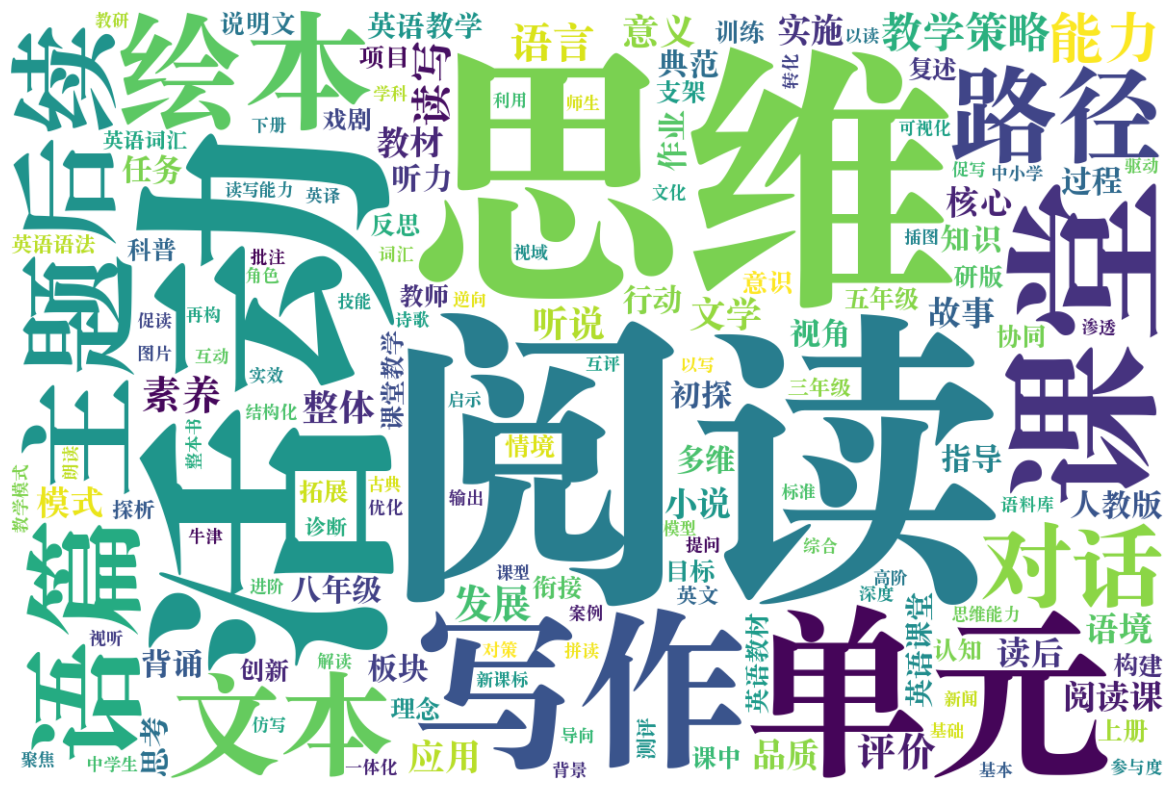

In [89]:
# Visualise the wordcloud and import the picture.
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('english_learning_wordcloud.png')

## 7. Analysis
The word cloud generated from manuscript titles in English Language Learning highlights a clear thematic concentration on reading, thinking, writing, and classroom activity design. The most prominent term is 阅读 (reading), indicating that reading instruction is a central concern of the journal. This focus is further supported by related terms such as 语篇 (text), 读写 (reading-writing), and 读后写 (post-reading writing), suggesting an integrated approach to reading and writing in the language learning process.

思维 (thinking) appears frequently, reflecting an emphasis on the cultivation of critical and reflective thinking skills. This focus aligns with broader educational goals that aim to develop students’ cognitive abilities and strategic learning approaches. Terms like 策略 (strategy), 路径 (pathway), and 反思 (reflection) further indicate an interest in thinking-driven teaching models and learning processes.

写作 (writing) is another dominant theme, pointing to the importance of writing pedagogy and its integration with reading activities. The recurrence of terms such as 任务 (task), 输出 (output), and 作文 (composition) suggests a task-based orientation that emphasizes writing as both a learning objective and a method for language output.

Classroom practice is a significant dimension of the submitted manuscripts, as seen in keywords like 课堂 (classroom), 活动 (activity), 实施 (implementation), and 教学策略 (teaching strategies). These terms imply a strong emphasis on practical teaching, lesson design, and classroom engagement. Additional words such as 单元 (unit), 项目 (project), and 模式 (model) point to structural considerations in curriculum design and innovative instructional formats.

Overall, the thematic focus of the journal’s manuscripts reflects a strong commitment to reading-centered instruction, the integration of thinking and writing, and the development of effective and engaging classroom practices.

## A small side quest：regional word cloud！
While I was working on the title-based word cloud, I got curious — what if I looked at author affiliations or regions instead? Maybe that would reveal something interesting too.

So I made a small tweak in the code to switch the data source: instead of grabbing all the titles, I pulled in the “作者地区” (author region) column and built a new corpus from that.

Of course, this required updating the stopword list again. This time I removed a different set of high-frequency but unhelpful words like “省” (province), “市” (city), “大学” (university), and similar generic location terms. I also filtered out empty entries and single-character tokens to keep things clean.

Then I used the same pipeline — segmentation, filtering, counting, word cloud generation — and it worked nicely.

The result? A word cloud that visually shows which regions or institutions appear most frequently. Not exactly deep analysis, but it was a fun side experiment and a good reminder that once the basic pipeline is built, you can reuse it flexibly for different types of text.

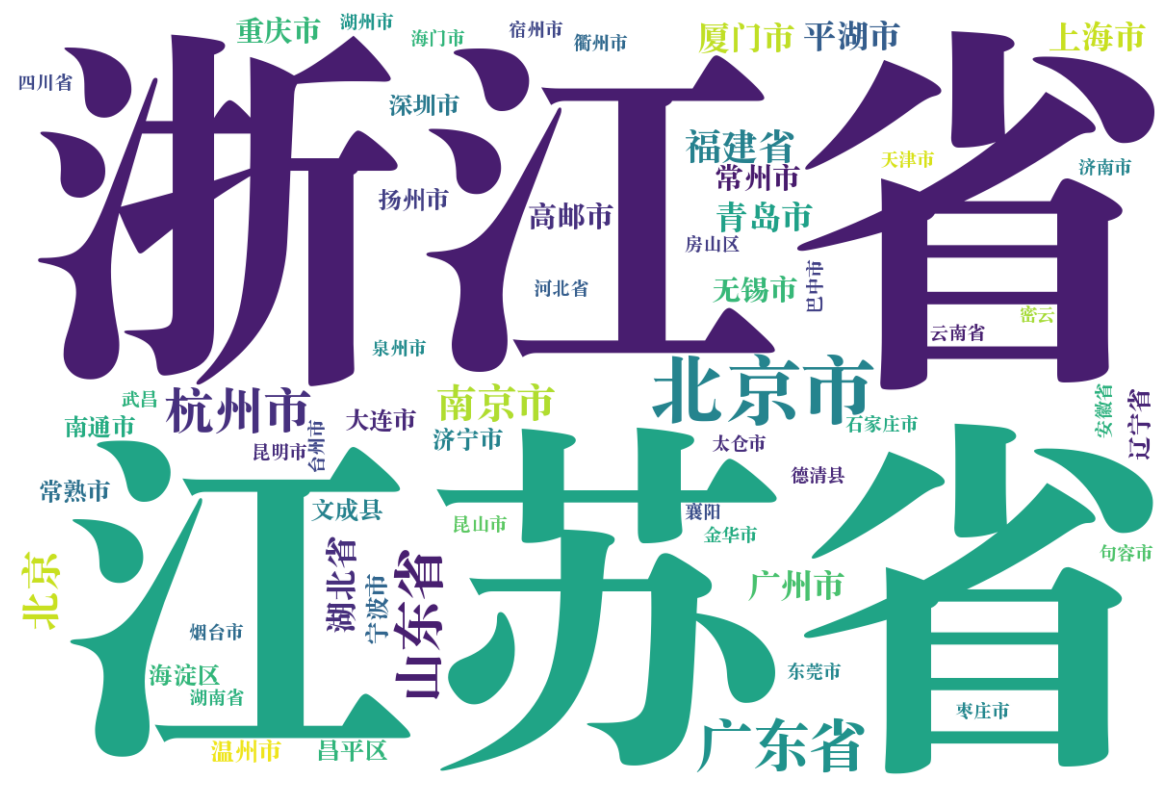

In [90]:
# import libraries
import pandas as pd
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

file_path = "/Users/snowliu/Downloads/20250307170539.xls"

# read Excel
df = pd.read_excel(file_path, sheet_name="稿件信息",header = 1)


# 2. Processing Chinese word segmentation
def process_text(text):
    # Custom stopword list
    stopwords = set(['市', '省', '区', '教育', '发展', '第', '一', '二', '州','学校','第一','附属中学','中学','小学','第二','大学','中学','中心小学','附属','教师','研究院','中心','高级中学','区景苑','分院','外国语','进修学校','第三','师范大学','师大附中','科技','研究','第三十九','中朗悦','集团','研究所','农村','陈经纶','阳光','科学','锦绣','国际','第七十九','信息工程'])
   
    # Use jieba for word segmentation
    words = jieba.lcut(str(text))
    
    # Filter out stopwords and non-Chinese characters
    filtered = [
        word for word in words 
        if len(word) > 1 and 
           '\u4e00' <= word[0] <= '\u9fff' and 
           word not in stopwords
    ]
    return ' '.join(filtered)

# 3. Generate corpus
all_titles = ' '.join(df['地区'].dropna())
processed_text = process_text(all_titles)

# 4. Count word frequency
word_counts = Counter(processed_text.split())

# 5. Generate word cloud
wc = WordCloud(
    font_path="/System/Library/Fonts/Supplemental/Songti.ttc",  
    background_color='white',  
    max_words=200,            
    width=1200, height=800,   
    colormap='viridis'        
)

wordcloud = wc.generate_from_frequencies(word_counts)

# visualisation
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('english_learning_wordcloud.png')

## 8. Conclusion

This project focuses on analysing the thematic trends of manuscripts published in the journal *English Language Learning* by applying natural language processing (NLP) techniques using Python. The manuscript titles, exported in Excel format from the editorial system, were first imported and processed using the `pandas` library. Chinese word segmentation was performed with the `jieba` package, and a custom stopword list was applied to remove common but semantically insignificant words, as well as non-Chinese characters, thereby enhancing the focus and clarity of the extracted keywords.

Following text processing, word frequency statistics were calculated using the `Counter` module. The `wordcloud` and `matplotlib` libraries were then used to visualize the results in the form of a word cloud. The visualization clearly highlights frequently occurring terms such as “阅读” (reading), “思维” (thinking), “写作” (writing), “课堂” (classroom), “活动” (activity), and “语篇” (text/discourse), indicating that current research in the journal places a strong emphasis on reading instruction, cognitive development, writing pedagogy, and classroom-based practices. These findings not only reflect ongoing trends in language education research but also provide data-driven insights into the journal's topical orientation.

This project demonstrates the effective application of natural language processing in the analysis of educational text data. It offers an end-to-end pipeline from data import and preprocessing to statistical analysis and visualization. The method presented is scalable and adaptable, with the potential to be applied in other contexts such as tracking topic evolution, identifying research hotspots, and optimizing editorial strategies in academic publishing. As such, it contributes to the broader goal of promoting digital and intelligent approaches in education research.

## What did I learn?
Building this pipeline was actually straightforward, but deciding what to keep or discard (in text cleaning) took the most thought.
I now appreciate how useful a domain-specific stopword list is. Generic ones don’t work well in educational contexts.
Visualization helps, but interpretation is key. A word cloud is just a starting point — I had to think about why certain words stood out and what they represented.
More personally:

I liked doing this kind of mini-project. It felt like a mix of editing, language analysis, and data work — all things I enjoy.
It gave me ideas for bigger things I might try next (e.g., topic modeling, cross-year comparisons, author-based trends).

## What could be better?
If I had more time, I’d love to:

Use TF-IDF instead of raw word counts (to highlight more unique terms)
Try topic modeling (like LDA) to see if articles cluster into different themes
Track keyword changes over time (like a mini “research trend report”)
Also… make the word cloud prettier. But that’s just me being picky.

## Final thought
This wasn’t a big or fancy project, but it was honest and useful. I got to work with real data from my field, sharpen my Python skills, and reflect on what’s happening in English education research — all at once.

Sometimes that’s all you need: a small project, a real question, and a few good tools.